In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
#데이터 생성
np.random.seed(12)
height = np.random.normal(loc=170, scale=10, size=100)
weight = np.random.normal(loc=70, scale=5, size=100)
print(height)
print(weight)

#데이터 프레임 --> csv 저장
data = pd.DataFrame({'Height' : height, 'Weight' : weight})
data.to_csv("./data/human_data.csv", index=False)
#데이터를 저장할 때 index=false이므로 index값이 없다.
print(data)

[174.72985831 163.18574121 172.42439497 152.99264366 177.53142834
 154.6527866  170.05127078 168.7977233  161.93018121 198.71819395
 164.02177081 174.72456994 180.95956118 157.84831199 183.42356371
 168.77850212 180.12515477 160.86130853 159.70469793 182.0979645
 175.01872304 171.38846177 176.40761113 175.27332665 158.45639765
 147.86666521 153.1824349  152.11905749 147.81465055 163.5256922
 164.71595679 169.60790825 172.14975948 166.15641197 167.46095922
 170.73252075 160.02796163 162.86143712 170.35416346 163.22054635
 164.28118938 168.94137685 183.35831339 173.18665288 166.6240475
 164.14731722 168.85080059 192.41817794 138.52583478 175.35135893
 172.32490439 178.67611951 158.51787286 191.14344241 180.00942761
 169.48585005 171.59787698 162.83736414 170.50522827 168.56662585
 179.43575391 173.57644225 169.16550797 176.77806103 175.56060374
 172.22719461 154.71014521 180.29211176 158.33741241 159.90438348
 168.94732011 175.12022158 184.07727764 153.12303669 184.71233993
 186.36462907

In [8]:
#생성한 csv 파일을 불러와서 데이터 분포 시각화
#csv 파일 읽기
data = pd.read_csv("./data/human_data.csv")

#키랑 체중 데이터 추출
height_data = data['Height']
weight_data = data['Weight']

print(weight_data)

0     63.171801
1     64.027778
2     70.079673
3     69.599783
4     68.745986
        ...    
95    68.020608
96    66.981524
97    71.836964
98    65.204941
99    62.023516
Name: Weight, Length: 100, dtype: float64


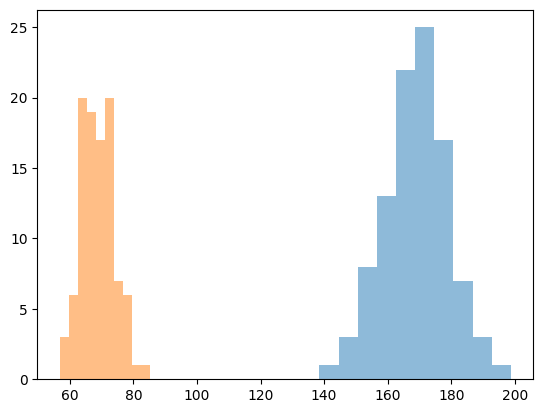

In [10]:
#데이터 분포 시각화
plt.hist(height_data, bins=10, alpha=0.5, label='Height')
plt.hist(weight_data, bins=10, alpha=0.5, label='Weight')
plt.show()

In [25]:
#키에 대한 정규분포 모델링
height_mean, height_std = norm.fit(height_data)
height_x = np.linspace(height_data.min(), height_data.max(), 100)
height_y = norm.pdf(height_x, height_mean, height_std)

#몸무게에 대한 정규분포 모델링
weight_mean, weight_std = norm.fit(weight_data)
weight_x = np.linspace(weight_data.min(), weight_data.max(), 100)
weight_y = norm.pdf(weight_x, weight_mean, weight_std)

print(height_x, height_y)

[138.52583478 139.13383841 139.74184204 140.34984567 140.9578493
 141.56585292 142.17385655 142.78186018 143.38986381 143.99786744
 144.60587106 145.21387469 145.82187832 146.42988195 147.03788558
 147.6458892  148.25389283 148.86189646 149.46990009 150.07790372
 150.68590734 151.29391097 151.9019146  152.50991823 153.11792185
 153.72592548 154.33392911 154.94193274 155.54993637 156.15793999
 156.76594362 157.37394725 157.98195088 158.58995451 159.19795813
 159.80596176 160.41396539 161.02196902 161.62997265 162.23797627
 162.8459799  163.45398353 164.06198716 164.66999079 165.27799441
 165.88599804 166.49400167 167.1020053  167.71000893 168.31801255
 168.92601618 169.53401981 170.14202344 170.75002706 171.35803069
 171.96603432 172.57403795 173.18204158 173.7900452  174.39804883
 175.00605246 175.61405609 176.22205972 176.83006334 177.43806697
 178.0460706  178.65407423 179.26207786 179.87008148 180.47808511
 181.08608874 181.69409237 182.302096   182.91009962 183.51810325
 184.126106

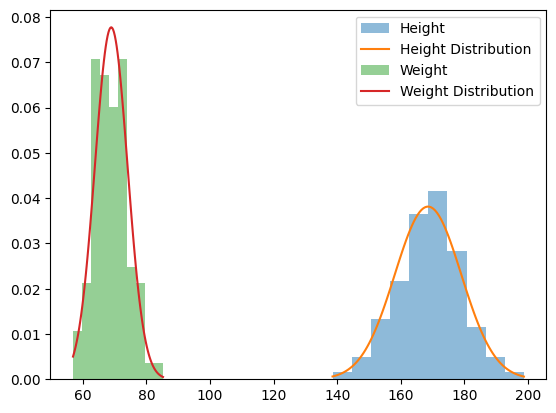

In [26]:
# 모델링 결과 시각화
plt.hist(height, bins=10, density=True, alpha=0.5, label='Height')
plt.plot(height_x, height_y, label='Height Distribution')
plt.hist(weight, bins=10, density=True, alpha=0.5, label='Weight')
plt.plot(weight_x, weight_y, label='Weight Distribution')
plt.legend(loc='upper right')
plt.show()